In [1]:
!grep -i mirlet7g /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [3]:
!samtools view -b -o /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126
!samtools view /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam | wc -l

[E::hts_open_format] Failed to open file "CLIP-35L33G.bam" : No such file or directory
samtools view: failed to open "CLIP-35L33G.bam" for reading: No such file or directory
[E::hts_open_format] Failed to open file "/data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam" : No such file or directory
samtools view: failed to open "/data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam" for reading: No such file or directory
0


In [6]:
!samtools view -b -o /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126
!samtools view /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam | wc -l

163


In [7]:
!samtools mpileup /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.bam > /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.pileup
!wc -l /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
68548 /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.pileup


In [9]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g.pileup > /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g-gene.pileup
!tail /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g-gene.pileup

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	N	138	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTTTTTTTTTTTTTT$TTTT$TTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HBEGIHIGFIIIBIIBE:HHGD>EGGDH7BIIGGIHHDHIHDEIGEIDHGG;GIHGHHIGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	N	133	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTT$TTTTTTTTTT$TTTTTTTT$TTTTTTTT

In [10]:
import pandas as pd

pileup = pd.read_csv('/data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD
87,chr9,106056126,N,30,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG


In [11]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [12]:
pileup[pileup['pos'] == 106056094].iloc[0]['matches']

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

In [30]:
from collections import Counter
import numpy as np
from scipy import stats

def shannon_entropy(sBases):
    arrFreqs        = np.array(list(Counter(sBases).values())) / sum(list(Counter(sBases).values()))
    shannon_entropy = stats.entropy(arrFreqs, base=2)
    return shannon_entropy

In [31]:
pileup['entropy'] = shannon_entropy(pileup['entropy'])
pileup['start'] = pileup.pos.sub(1)
pileup.head()

,chrom,pos,_ref,count,basereads,quals,matches,entropy,start
0,chr13,48691305,N,109,cccccccccccccccccccccccccccccccccccccccccccccc...,B?IBHBIGI>GGHHH:IIHFGGIIIGHHIHIIBIG?IGBFIE>@II...,cccccccccccccccccccccccccccccccccccccccccccccc...,0.660462,48691304
1,chr13,48691306,N,109,tttttttttttttttttttttttttttttttttttttttttttttt...,=GH0H=IBI>IHHGH?IIIGGHBII@HHIGHIDIIIGDHIFGEIHG...,tttttttttttttttttttttttttttttttttttttttttttttt...,0.660462,48691305
2,chr13,48691307,N,109,cccccccccccccccccccccccccccccccccccccccccccccc...,;GIBH=IGIAEHH:H:IIIHEHIIIEIDHHIIGII:IIDBI<>GII...,cccccccccccccccccccccccccccccccccccccccccccccc...,0.660462,48691306
3,chr13,48691308,N,109,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,AGI?H6IGI?IHHHHBIIIHEHHIIGIHIIIIGII<IIDFIEE<II...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.660462,48691307
4,chr13,48691309,N,109,gggggggggggggggggggggggggggggggggggggggggggggg...,>EI>F=IDGEIIHHGBIIIHHHIIIGIHHHIIDII:II5HIGG@II...,gggggggggggggggggggggggggggggggggggggggggggggg...,0.660462,48691308


In [32]:
pileup[['chrom', 'start', 'pos', 'entropy']].to_csv('/data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//Mirlet7g_entropy.bedGraph', sep='\t', index=None, header=None)
pileup[['chrom', 'start', 'pos', 'entropy']]

,chrom,start,pos,entropy
0,chr13,48691304,48691305,0.660462
1,chr13,48691305,48691306,0.660462
2,chr13,48691306,48691307,0.660462
3,chr13,48691307,48691308,0.660462
4,chr13,48691308,48691309,0.660462
...,...,...,...,...
77,chr13,48691381,48691382,0.660462
78,chr13,48691382,48691383,0.660462
79,chr13,48691383,48691384,0.660462
80,chr13,48691384,48691385,0.660462


<AxesSubplot:>

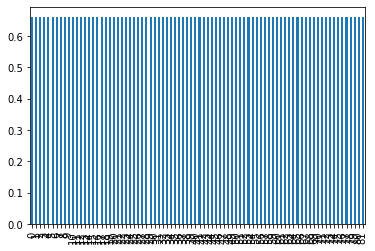

In [20]:
pileup.entropy.plot.bar()

In [26]:
!grep -i mirlet7f-1 /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/gencode.gtf
!samtools view -b -o /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.bam /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-35L33G.bam chr13:48691305-48691393
!samtools view /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.bam | wc -l
!samtools mpileup /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.bam > /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.pileup
!wc -l /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.pileup
!awk '$2 >= 48691305 && $2 <= 48691393 { print $0; }' /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.pileup > /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1-gene.pileup
!tail /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1-gene.pileup

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
158
[mpileup] 1 samples in 1 input files
97 /data1/projects//2021_MOPA/bioinfo/binfo1-datapack1//CLIP-let7f-1.pileup
chr13	48691377	N	24	tttttttttttttttttttttttt	BIIGIGEDCGFIFGI@GHIDDIGI
chr13	48691378	N	24	aaaaaaaaaaa

<AxesSubplot:>

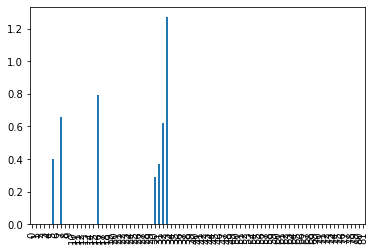

In [27]:
pileup = pd.read_csv('/data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/CLIP-let7f-1-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
toremove = re.compile('[<>$*#^]')

pileup['entropy'] = pileup['matches'].apply(calculate_shannon_entropy)
pileup.head()

pileup[['chrom', 'start', 'pos', 'entropy']].to_csv('/data1/projects//2021_MOPA/bioinfo/binfo1-datapack1/Mirlet7f-1_entropy.bedGraph', sep='\t', index=None, header=None)
pileup[['chrom', 'start', 'pos', 'entropy']]

pileup.entropy.plot.bar()
